In [17]:
import pandas as pd
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras import preprocessing
import csv
import matplotlib.pyplot as plt

In [3]:
file_path = "TS_Freq_array.csv"

# Initialize arrays
y_labels = []
x_TS = []

# Read the CSV file line by line
with open(file_path, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    
    next(csv_reader)
    
    # Extract the first column and construct rows as arrays
    for row in csv_reader:
        y_labels.append(row[0])
        x_TS.append(row[1:])

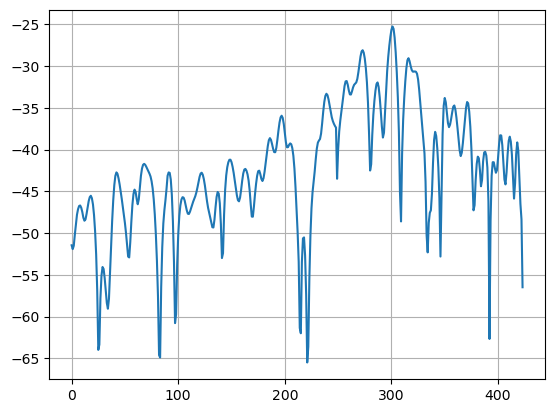

In [39]:
TS_array = np.array(x_TS[0])
TS_array = np.array(TS_array, dtype=float)

# Create an array of x values
x_values = np.arange(len(TS_array))

# Plot the graph for the first time ping
plt.plot(x_values, TS_array, linestyle='-')
plt.grid(True)
plt.savefig('TS_Freq_1.png')
plt.show()

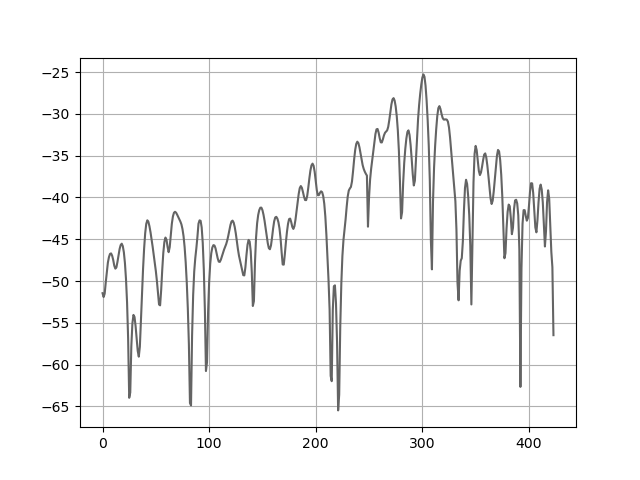

In [69]:
# Get gray image
image = Image.open('TS_Freq_1.png')
gray_image = image.convert('L')
gray_image

/tmp/ipykernel_382/734779413.py:2: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  gray_image = gray_image.resize((488, 244), Image.ANTIALIAS)


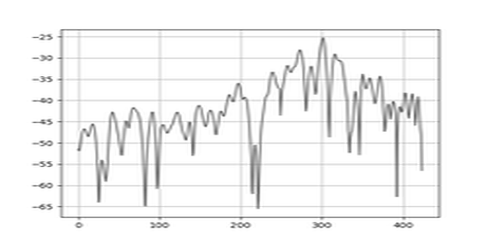

In [80]:
# Resize gray image based on the code from original paper
gray_image = gray_image.resize((488, 244), Image.ANTIALIAS)
gray_image

In [89]:
# Turn gray image into an array indicating pixels
im_as_arr = np.float32(gray_image) # Q: will the axis labels affect the values?
im_as_arr = np.expand_dims(im_as_arr, axis=2)
# print(im_as_arr.shape) # Height = 244, width = 244 , channel = 1 (gray scale)

im_as_arr = im_as_arr.transpose(2, 1, 0)  # Convert array to D,W,H
im_as_arr.shape

In [87]:
# Normalize the channels

# Mean and std adapted from the original study
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Normalize the channels
for channel, _ in enumerate(im_as_arr):
    im_as_arr[channel] /= 255
    im_as_arr[channel] -= mean[channel]
    im_as_arr[channel] /= std[channel]
    
print(im_as_arr)

[[[-2.153513 -2.153513 -2.153513 ... -2.153513 -2.153513 -2.153513]
  [-2.153513 -2.153513 -2.153513 ... -2.153513 -2.153513 -2.153513]
  [-2.153513 -2.153513 -2.153513 ... -2.153513 -2.153513 -2.153513]
  ...
  [-2.153513 -2.153513 -2.153513 ... -2.153513 -2.153513 -2.153513]
  [-2.153513 -2.153513 -2.153513 ... -2.153513 -2.153513 -2.153513]
  [-2.153513 -2.153513 -2.153513 ... -2.153513 -2.153513 -2.153513]]]


In [86]:
import torch

# Convert to float tensor
im_as_ten = torch.from_numpy(im_as_arr).float()

# ? Add one more channel to the beginning. Tensor shape = 1,3,224,224
im_as_ten.unsqueeze_(0)

# Convert to Pytorch variable
im_as_var = Variable(im_as_ten, requires_grad=True)

ModuleNotFoundError: No module named 'torch'

# A reference of the original method

In [ ]:
def preprocess_image(pil_im, resize_im=True):
    """
        Processes image for CNNs

    Args:
        PIL_img (PIL_img): PIL Image or numpy array to process
        resize_im (bool): Resize to 224 or not
    returns:
        im_as_var (torch variable): Variable that contains processed float tensor
    """
    # Mean and std list for channels (Imagenet)
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]

    # Ensure or transform incoming image to PIL image
    if type(pil_im) != Image.Image:
        try:
            pil_im = Image.fromarray(pil_im)
        except Exception as e:
            print("could not transform PIL_img to a PIL Image object. Please check input.")

    # Resize image
    if resize_im:
        pil_im = pil_im.resize((20, 20), Image.ANTIALIAS)

    im_as_arr = np.float32(pil_im)
    im_as_arr = im_as_arr.transpose(2, 0, 1)  # Convert array to D,W,H
    
    # Normalize the channels
    for channel, _ in enumerate(im_as_arr):
        im_as_arr[channel] /= 255
        im_as_arr[channel] -= mean[channel]
        im_as_arr[channel] /= std[channel]
    # Convert to float tensor
    im_as_ten = torch.from_numpy(im_as_arr).float()
    # Add one more channel to the beginning. Tensor shape = 1,3,224,224
    im_as_ten.unsqueeze_(0)
    # Convert to Pytorch variable
    im_as_var = Variable(im_as_ten, requires_grad=True)
    return im_as_var